# TSF DSBA: TASK 03 PREDICTION USING DECISION TREE ALGORITHM

## BY NIKITA GUPTA

### DECISION TREE ALGORITHM
In this task3, we have to create the decision tree classifier and visualize it graphically. The purpose is if we feed any new data to the classifier, it will be able to predict the right class accordingly.

In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Importing the iris_dataset
from google.colab import files
uploaded= files.upload()

Saving Iris.csv to Iris.csv


In [7]:
df=pd.read_csv('Iris.csv',header=0)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
# Modifying the columns
df=pd.read_csv('Iris.csv', header=0, index_col='Id')
df.columns=['Sepal Length in cm','Sepal Width in cm','Petal Length in cm','Petal Width in cm','Species']
df

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [10]:
# Summary Statistics

# Gives information about the entire dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal Length in cm  150 non-null    float64
 1   Sepal Width in cm   150 non-null    float64
 2   Petal Length in cm  150 non-null    float64
 3   Petal Width in cm   150 non-null    float64
 4   Species             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [11]:
df.describe()

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# Checking for null values
df.isnull().sum()

Sepal Length in cm    0
Sepal Width in cm     0
Petal Length in cm    0
Petal Width in cm     0
Species               0
dtype: int64

So, there are no null values or missing values in the dataset.

In [14]:
# To find the number of rows and columns in dataset
df.shape

(150, 5)

### Find and replace method to Encode categorical variable.

In [28]:
nums = {"Species": {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}}
df.replace(nums, inplace=True)
df.head()

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


### Visualising the relationship between the various variables

In [23]:
# To find the number of unique species in the dataset
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

So, there are 3 unique classes or species in the dataset.

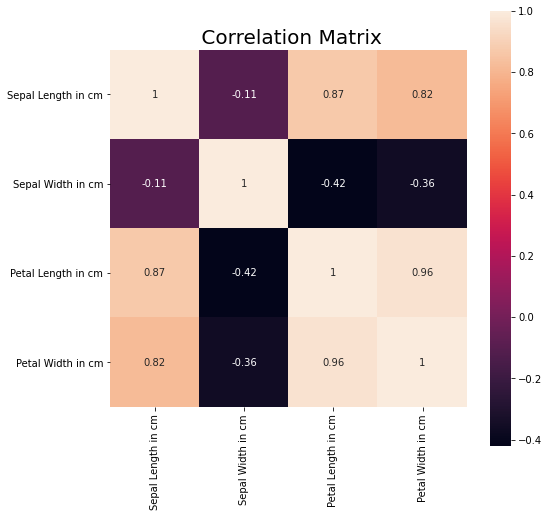

In [26]:
# To find the correlation between the variables
corrmat = df.corr() 
fig = plt.figure(figsize = (8, 8)) 
map=sns.heatmap(corrmat, vmax = 1, square = True,annot=True) 
map.set_title(' Correlation Matrix', fontsize=20)
plt.show()

All the features are highly corerelated to one other. This tells us that every features effects every other feature.

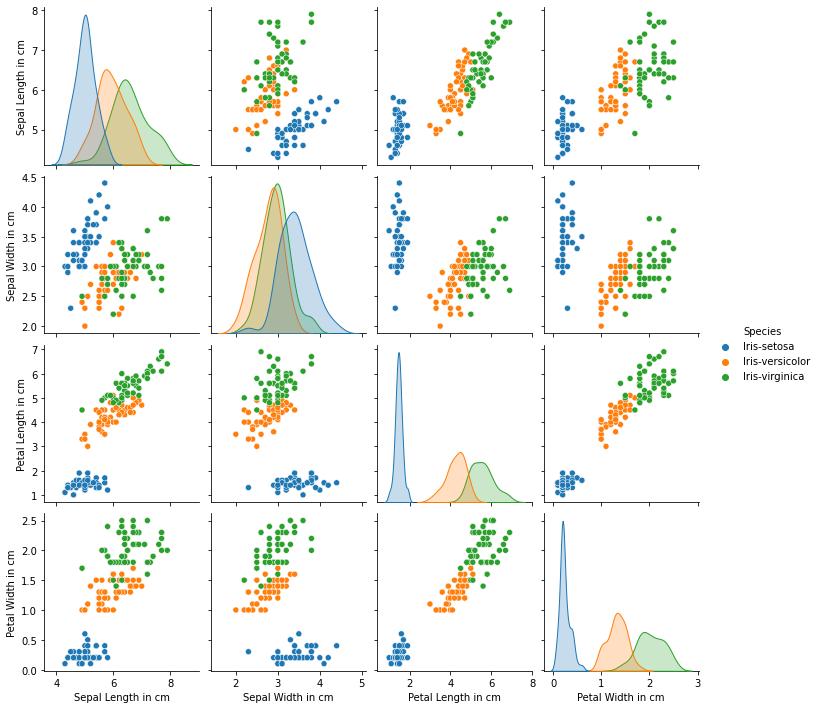

In [27]:
# Plotting the pairwise relationships among the different variables of the dataset.
import seaborn as sns
sns.pairplot(df,hue='Species')

Iris-setosa can be highlt attributed with Petal Length and Petal Width. However the other two cannot be.

## DATA PREPARATION

In [31]:
# Decision Tree Classifier
X = (df.drop('Species', axis=1)).values  #X part which contains the independent variables(Sepal Length, Sepal Width, Petal Length and Petal Width).
y = df['Species']                        #y part that contains the dependent variable (Species).

# Importing the train_test_split() function with the help of sklearn library in order to further divide dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": [1,5,10,50,100,500,1000], 
              "min_samples_split": [5,10,100,5000]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
print(tree_clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


## MODEL APPLICATION

In [35]:
model=DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split=5,random_state=0)
model.fit(X_train, y_train)
Pred=model.predict(X_test)

### Actual vs Predicted values

In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': Pred})
df

,Actual,Predicted
Id,,
115,2,2
63,1,1
34,0,0
108,2,2
8,0,0
101,2,2
41,0,0
87,1,1
77,1,1


In [37]:
# To find out the accuracy and how precisied our model is.
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score
acc = accuracy_score(y_test, Pred) 
print("Classifiers has a accuracy of {}".format(acc))
prec = precision_score(y_test, Pred, pos_label='positive',average='micro') 
print("Classifiers has a precision of {}".format(prec))

Classifiers has a accuracy of 0.9666666666666667
Classifiers has a precision of 0.9666666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


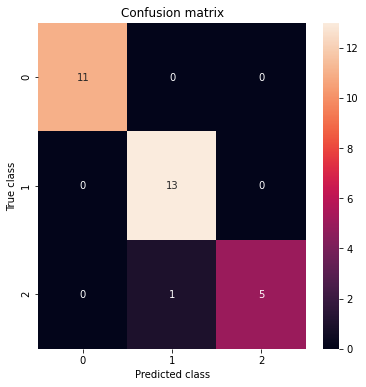

In [38]:
# Creating Confusion Matrix
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusion_matrix(y_test,Pred,labels = [0,1,2]),annot = True); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

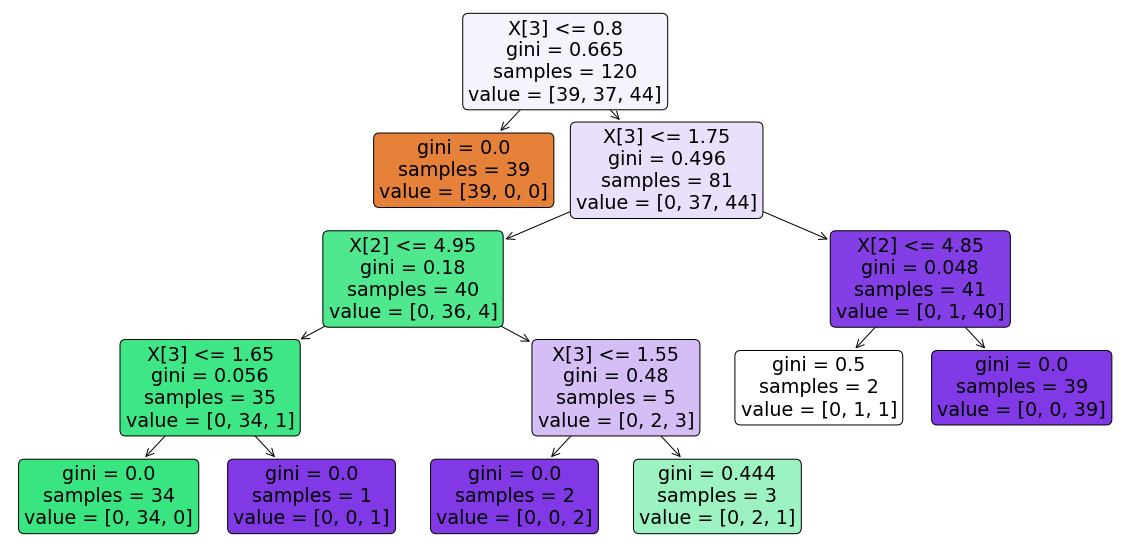

In [40]:
# Creating Decision Tree
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model,rounded=True,filled=True)
plt.show()

Considering the accuracy and precision value, we can conclude that our decision tree model works fine.

### Thus, with this, we completed the task3 of prediction using decision tree algorithm.

### Thank you